# About Dataset

## Project Overview:
This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008 - Dec 2016.

The Dataset Contains:
* lsoa_code : this represents a policing area
* borough : the london borough for which the statistic is related
* major_category : the major crime category
* minor_category : the minor crime category
* value : the count of the crime for that particular borough, in that particular month
* year : the year of the summary statistic
* month : the month of the summary statistic

---

# Import Libraries

In [1]:
# library untuk DataFrame
import numpy as np 
import pandas as pd

# library untuk visualisasi
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import folium

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

## Preprocessing Dataset

In [2]:
# membaca dataset
df = pd.read_csv('london_crime_by_lsoa.csv')
print('London Crime Data, 2008-2016')
df

London Crime Data, 2008-2016


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
# menampilkan 5 data teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# menampilkan 5 data terbawah
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
# deskripsi statistik dataset
df.describe(include = 'all')

,lsoa_code,borough,major_category,minor_category,value,year,month
count,13490604,13490604,13490604,13490604,1.349060e+07,1.349060e+07,1.349060e+07
unique,4835,33,9,32,NaN,NaN,NaN
top,E01003689,Croydon,Theft and Handling,Common Assault,NaN,NaN,NaN
freq,3456,602100,3966300,522180,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.779444e-01,2.012000e+03,6.500000e+00
std,NaN,NaN,NaN,NaN,1.771513e+00,2.581989e+00,3.452053e+00
min,NaN,NaN,NaN,NaN,0.000000e+00,2.008000e+03,1.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,2.010000e+03,3.750000e+00
50%,NaN,NaN,NaN,NaN,0.000000e+00,2.012000e+03,6.500000e+00
75%,NaN,NaN,NaN,NaN,1.000000e+00,2.014000e+03,9.250000e+00


In [6]:
# informasi tentang tipe data untuk masing-masing atribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
# menampilkan (jumlah baris, jumlah kolom)
df.shape

(13490604, 7)

In [8]:
# melihat jumlah missing value pada setiap kolom
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

---

# Data Visualization

## Area Plot

#### Pertanyaan:
    Wilayah apa yang memiliki tingkat kriminalitas rendah pada tahun 2008-2016?

In [9]:
# menghapus kolom yang tidak diperlukan
low_borough = df.drop(['lsoa_code', 'major_category', 'minor_category', 'month'], axis = 1)

# mengelompokkan data
low_borough = low_borough.set_index('year').groupby('borough').sum()
low_borough = low_borough.sort_values(by = 'value', ascending = True).head()
low_borough

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136


dari tabel di atas, terlihat 5 wilayah yang memiliki tingkat kriminalitas rendah pada tahun 2008-2016. Berikut ini partisi 5 wilayah terhadap tahun terjadinya:

In [10]:
# membuat pivot tabel untuk melihat wilayah dengan kriminalitas rendah dalam tahunan sejak 2008-2016
low5_borough = df.drop(['lsoa_code', 'major_category', 'minor_category', 'month'], axis = 1).set_index('borough')
low5_borough = low5_borough.loc[low_borough.index]
low5_borough = pd.pivot_table(low5_borough, values = 'value', 
                                              aggfunc = np.sum, 
                                              index = 'year', 
                                              columns = 'borough')
low5_borough

borough,Bexley,City of London,Kingston upon Thames,Richmond upon Thames,Sutton
year,,,,,
2008,15305,0,10661,11106,12943
2009,14445,0,10163,10618,12240
2010,13166,0,10171,10601,12032
2011,11325,69,10155,10896,11068
2012,11669,157,9956,11168,10948
2013,11552,110,9191,10439,10057
2014,11844,115,9288,10456,10443
2015,11990,151,9738,10413,10598
2016,12840,178,9983,11074,10658


#### Stacked Area Plot

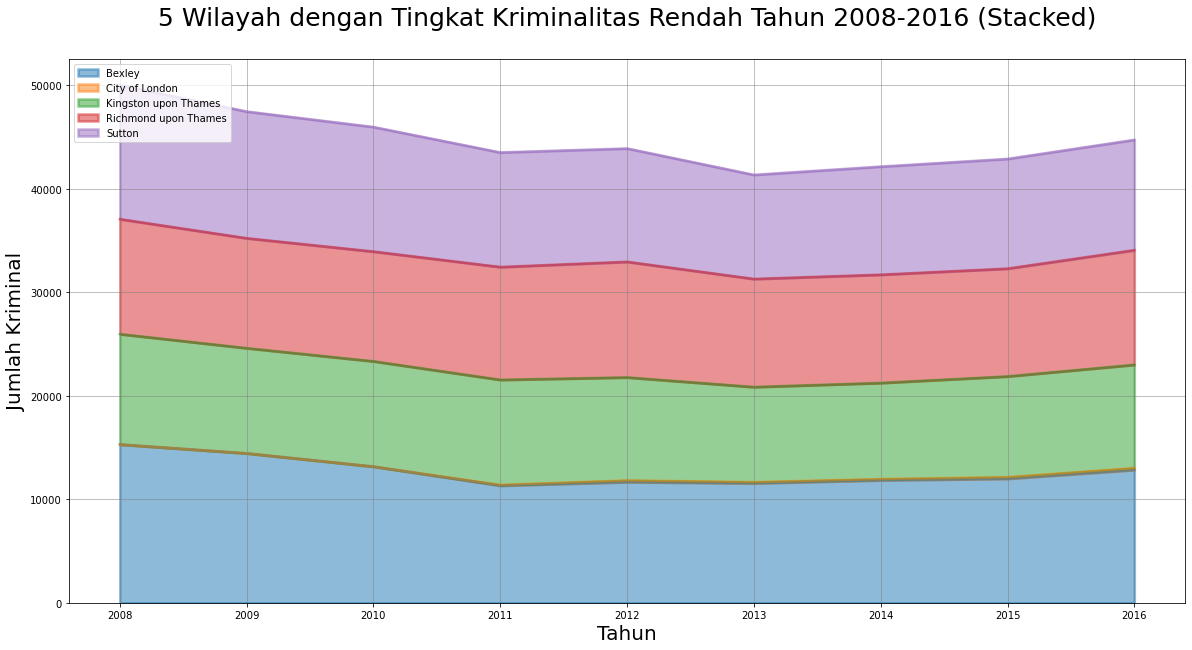

In [11]:
low5_borough.plot(kind = 'area',
                  alpha = 0.5,
                  stacked = True,
                  figsize = (20,10),
                  linewidth = 2.5
                 )

plt.title('5 Wilayah dengan Tingkat Kriminalitas Rendah Tahun 2008-2016 (Stacked)\n', fontsize = 25)
plt.ylabel('Jumlah Kriminal', fontsize = 20)
plt.xlabel('Tahun', fontsize = 20)
plt.grid(color = 'grey', linewidth = 0.5)
plt.legend(loc = 'upper left')
plt.show()

#### Unstacked Area Plot

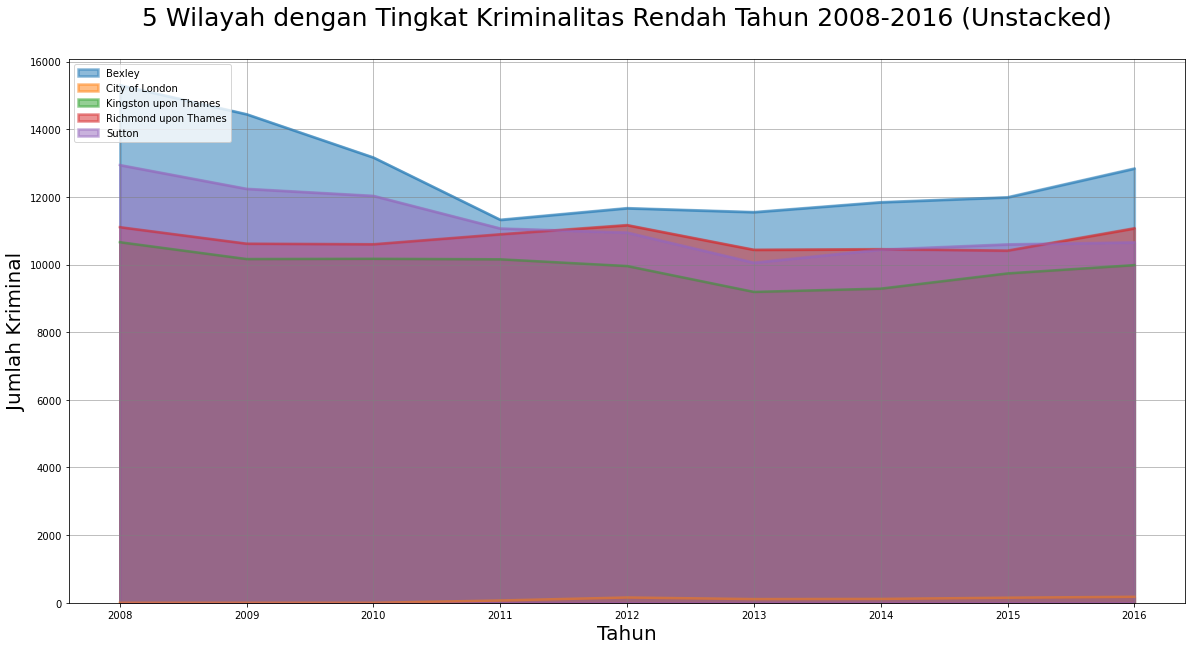

In [12]:
low5_borough.plot(kind = 'area',
                  alpha = 0.5,
                  stacked = False,
                  figsize = (20,10),
                  linewidth = 2.5
                 )

plt.title('5 Wilayah dengan Tingkat Kriminalitas Rendah Tahun 2008-2016 (Unstacked)\n', fontsize = 25)
plt.ylabel('Jumlah Kriminal', fontsize = 20)
plt.xlabel('Tahun', fontsize = 20)
plt.grid(color = 'grey', linewidth = 0.5)
plt.legend(loc = 'upper left')
plt.show()

Berdasarkan visualisasi di atas, diperoleh bahwa City of Landon merupakan wilayah yang memiliki tingkat kriminalitas terendah di tahun 2008 hingga 2016 sebanyak 780 dengan wilayah terendah yang mengikuti adalah Kingston upon Thames, Richmond upon Thames, Sutton, dan Bexley. City of London pada tahun 2008 hingga 2010 tidak terdapat kriminalitas hingga 2016 terjadi peningkatan yang sangat signifikan. Berbeda dengan kota lainnya, yang mengalami penurunan secara signifikan tingkat kriminalitas dari tahun 2008 hingga 2016.

#### Pertanyaan:
    Kategori kejahatan apa yang memiliki tingkat kejadian tertinggi pada tahun 2008-2016?

In [13]:
# menghapus kolom yang tidak diperlukan
top_major = df.drop(['lsoa_code', 'borough', 'minor_category', 'month'], axis = 1)

# mengelompokkan data
top_major = top_major.set_index('year').groupby('major_category').sum()
top_major = top_major.sort_values(by = 'value', ascending = False).head()
top_major

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765


dari tabel di atas, terlihat 5 kategori kejahatan dengan tingkat kejadian tertinggi pada tahun 2008-2016. Berikut ini partisi 5 kategori kejahatan terhadap tahun terjadinya:

In [14]:
# membuat pivot tabel untuk melihat kategori kriminal tertinggi dalam tahunan sejak 2008-2016
top5_major = df.drop(['lsoa_code', 'borough', 'minor_category', 'month'], axis = 1).set_index('major_category')
top5_major = top5_major.loc[top_major.index]
top5_major = pd.pivot_table(top5_major, values = 'value', 
                                        aggfunc = np.sum, 
                                        index = 'year', 
                                        columns = 'major_category')
top5_major

major_category,Burglary,Criminal Damage,Drugs,Theft and Handling,Violence Against the Person
year,,,,,
2008,88092,91872,68804,283692,159844
2009,90619,85565,60549,279492,160777
2010,86826,77897,58674,290924,157894
2011,93315,70914,57550,309292,146901
2012,93392,62158,51776,334054,150014
2013,87222,56206,50278,306372,146181
2014,76053,59279,44435,279880,185349
2015,70489,62976,39785,284022,218740
2016,68285,64071,38914,294133,232381


#### Stacked Area Plot

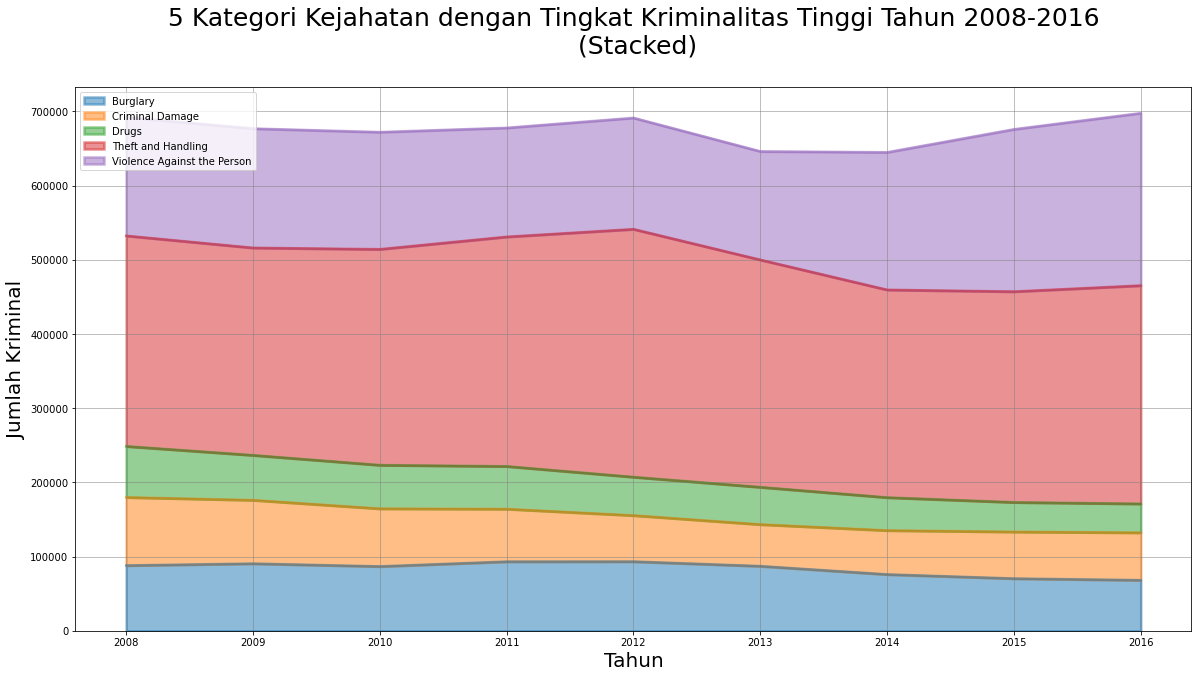

In [15]:
top5_major.plot(kind = 'area',
                alpha = 0.5,
                stacked = True,
                figsize = (20,10),
                linewidth = 2.5
                )

plt.title('5 Kategori Kejahatan dengan Tingkat Kriminalitas Tinggi Tahun 2008-2016\n (Stacked)\n', fontsize = 25)
plt.ylabel('Jumlah Kriminal', fontsize = 20)
plt.xlabel('Tahun', fontsize = 20)
plt.grid(color = 'grey', linewidth = 0.5)
plt.legend(loc = 'upper left')
plt.show()

#### Unstacked Area Plot

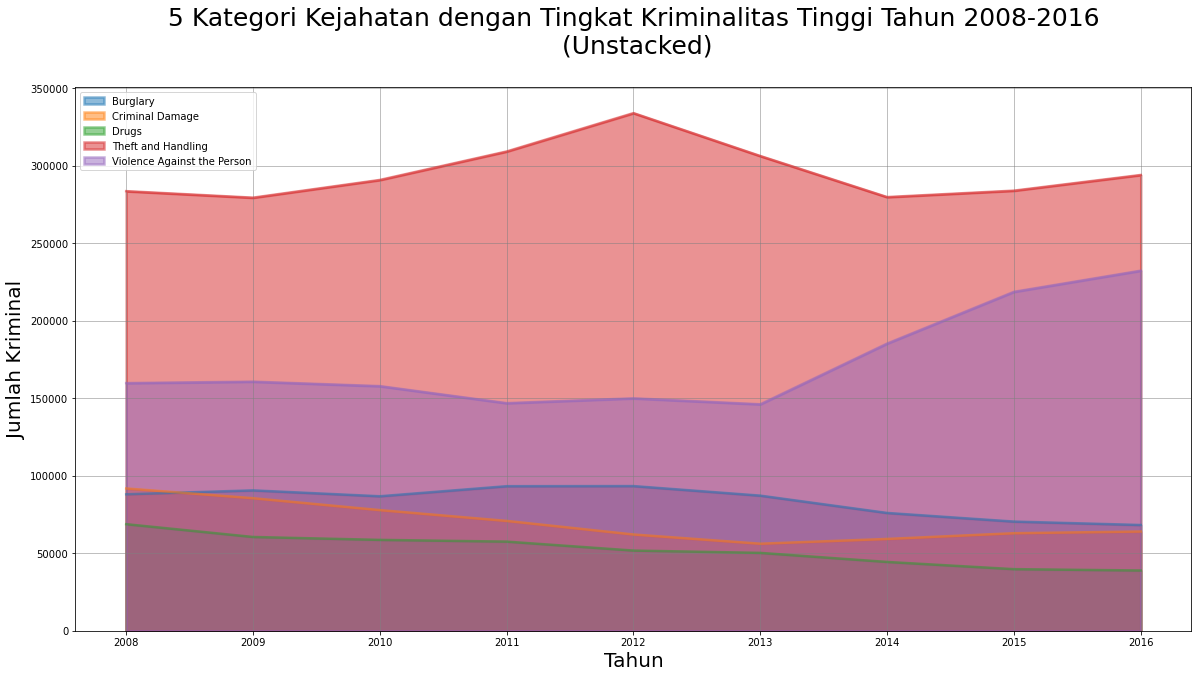

In [16]:
top5_major.plot(kind = 'area',
                alpha = 0.5,
                stacked = False,
                figsize = (20,10),
                linewidth = 2.5
                )

plt.title('5 Kategori Kejahatan dengan Tingkat Kriminalitas Tinggi Tahun 2008-2016\n (Unstacked)\n', fontsize = 25)
plt.ylabel('Jumlah Kriminal', fontsize = 20)
plt.xlabel('Tahun', fontsize = 20)
plt.grid(color = 'grey', linewidth = 0.5)
plt.legend(loc = 'upper left')
plt.show()

Berdasarkan visualisasi di atas, diperoleh bahwa Theft and Handling merupakan kategori kejahatan yang memiliki tingkat kriminalitas tertinggi di tahun 2008 hingga 2016 sebanyak 2661861 dengan kategori kejahatan tertinggi yang mengikuti adalah Violence Against the Person, Burglary, Criminal Damage, dan Drugs. Theft and Handling pada tahun 2008 hingga 2016 memiliki frekuensi kejadian dengan rentang 280ribu hingga 330ribu pertahun selama 2008 hingga 2016, sedangkan 4 kategori lainnya terjadi sebanyak 30ribu hingga 230ribu pertahunnya. Jumlah tertinggi kategori Theft and Handling terjadi pada tahun 2012 yaitu sebesar 334054 dan terendah terjadi pada tahun 2009 yaitu sebesar 279492. Terdapat perbedaan yang sangat signifikan antara kategori tertinggi dengan 4 lainnya, terlihat dari rata-rata jumlah kejadian yang terjadi pertahunnya. 

#### Kesimpulan:
* Terdapat 5 wilayah yang memiliki tingkat kriminal terendah yaitu : Bexley, Sutton, Richmond upon Thames, Kingston upon Thames, dan City of London.
* Terdapat 5 kategori kejahatan yang memiliki tingkat kejadian tertinggi yaitu : Theft and Handling, Violence Against the Person, Burglary, Criminal Damage, dan Drugs.

---

## Histogram

### Pertanyaan:
    Bagaimana distribusi frekuensi jumlah kriminalitas yang terjadi di masing-masing wilayah London pada tahun 2008-2016?

In [17]:
# menghapus kolom yang tidak diperlukan
crime_freq = df.drop(['lsoa_code', 'major_category', 'minor_category', 'month'], axis = 1)

# mengelompokkan data
crime_freq = crime_freq.set_index('year').groupby('borough').sum()
crime_freq

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


dari tabel di atas, terlihat jumlah kriminalitas di masing-masing wilayah metropolitan di London selama tahun 2008-2016. Berikut ini partisi interval sumbu x untuk memperoleh range bin dan jumlah frekuensi:

In [18]:
count, bin_edges = np.histogram(crime_freq)

print(count)
print(bin_edges)

[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


Secara default, metode histogram memecah dataset menjadi 10 bin. Berikut rangkuman range bin dan distribusi frekuensi jumlah kriminalitas di wilayah London. Terdapat:
* 1 wilayah mengalami 780 hingga 46204.8 kriminalitas
* 1 wilayah mengalami 46204.8 hingga 91629.6 kriminalitas
* 5 wilayah mengalami  91629.6 hingga 137054.4 kriminalitas, dst...

sehingga, akan membentuk grafik distribusi sebagai berikut:

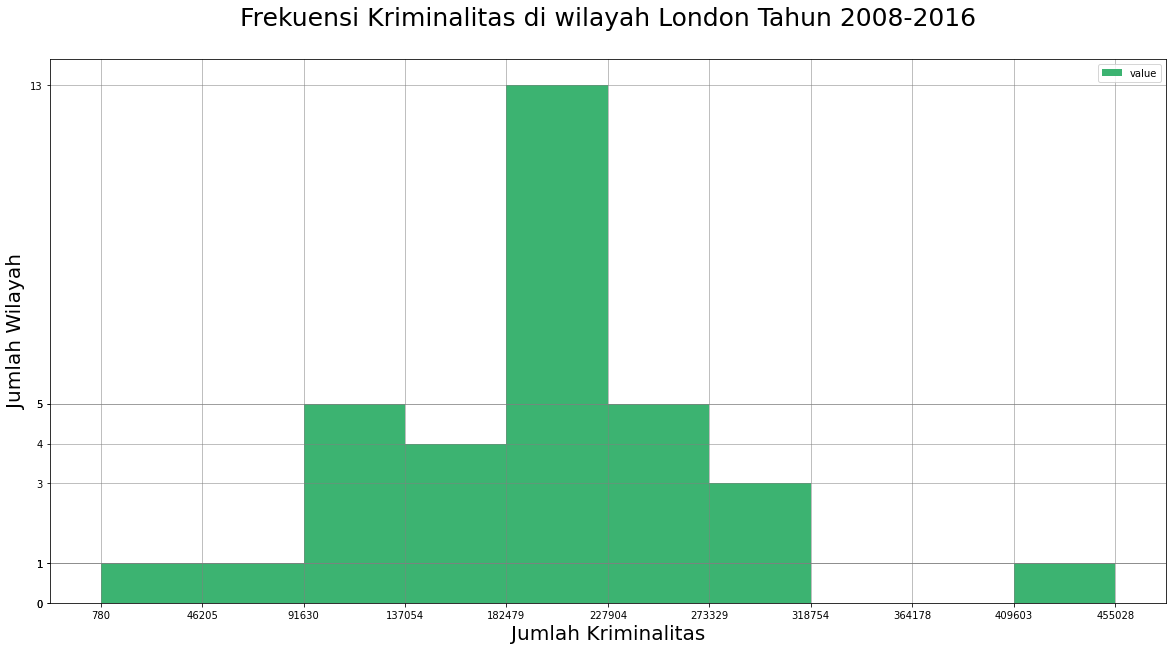

In [19]:
crime_freq.plot(kind = 'hist',
                figsize = (20,10),
                xticks = bin_edges,
                yticks = count,
                color = 'mediumseagreen'
               )

plt.title('Frekuensi Kriminalitas di wilayah London Tahun 2008-2016\n', fontsize = 25)
plt.xlabel("Jumlah Kriminalitas", fontsize = 20)
plt.ylabel("Jumlah Wilayah", fontsize = 20)
plt.grid(color = 'grey', linewidth = 0.5)
plt.show()

Berdasarkan visualisasi di atas, diperoleh bahwa frekuensi terbesar dari jumlah kriminalitas yang terjadi adalah dalam rentang 182479 hingga 227904 yaitu sebanyak 13 wilayah di London pada tahun 2008-2016. Sedangkan frekuensi terkecil dari jumlah kriminalitas yang terjadi adalah dalam rentang 780 hingga 91630 dan 409603 hingga 455028 yaitu sebanyak 1 wilayah di London pada tahun 2008-2016. Kemudian, terlihat bahwa tidak terdapat wilayah di London yang memiliki jumlah kriminalitas dalam rentang 318754 hingga 409603 yang terjadi pada tahun 2008-2016.

### Pertanyaan:
    Bagaimana distribusi frekuensi jumlah kriminalitas kategori tertinggi yang terjadi di wilayah London pada tahun 2008-2016 ?

In [20]:
# menghapus kolom yang tidak diperlukan
top_major = df.drop(['lsoa_code', 'borough', 'minor_category', 'month'], axis = 1)

# mengelompokkan data
top_major = top_major.set_index('year').groupby('major_category').sum()
top_major = top_major.sort_values(by = 'value', ascending = False).head()
top_major

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765


dari tabel di atas, terlihat 5 kategori kejahatan dengan tingkat kejadian tertinggi pada tahun 2008-2016.

In [21]:
# membuat pivot tabel untuk melihat kategori kriminal tertinggi dalam tahunan sejak 2008-2016
major5_freq = df.drop(['lsoa_code', 'borough', 'minor_category', 'month'], axis = 1).set_index('major_category')
major5_freq = major5_freq.loc[top_major.index]
major5_freq = pd.pivot_table(major5_freq, values = 'value', 
                                        aggfunc = np.sum, 
                                        index = 'year', 
                                        columns = 'major_category')
major5_freq

major_category,Burglary,Criminal Damage,Drugs,Theft and Handling,Violence Against the Person
year,,,,,
2008,88092,91872,68804,283692,159844
2009,90619,85565,60549,279492,160777
2010,86826,77897,58674,290924,157894
2011,93315,70914,57550,309292,146901
2012,93392,62158,51776,334054,150014
2013,87222,56206,50278,306372,146181
2014,76053,59279,44435,279880,185349
2015,70489,62976,39785,284022,218740
2016,68285,64071,38914,294133,232381


Berikut ini partisi interval sumbu x untuk memperoleh range bin dan jumlah frekuensi:

In [22]:
count, bin_edges = np.histogram(major5_freq)

print(count)
print(bin_edges)

[14 13  0  3  4  0  2  0  6  3]
[ 38914.  68428.  97942. 127456. 156970. 186484. 215998. 245512. 275026.
 304540. 334054.]


Secara default, metode histogram memecah dataset menjadi 10 bin. Sehingga, akan membentuk grafik distribusi sebagai berikut:

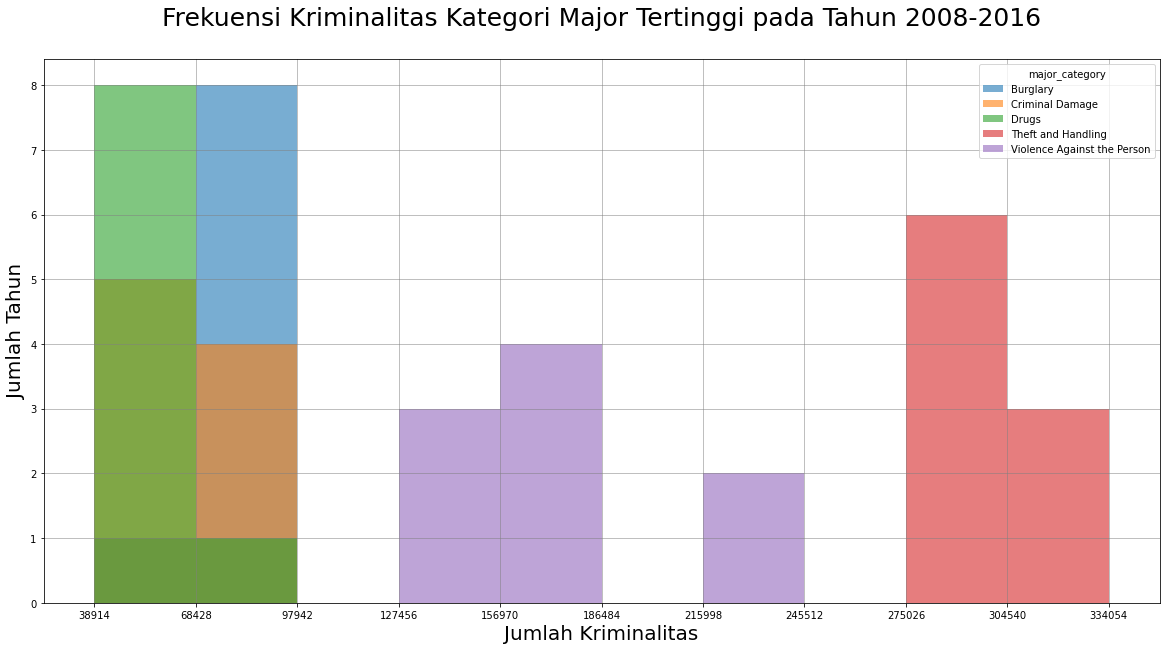

In [23]:
major5_freq.plot(kind = 'hist',
                 figsize = (20,10),
                 alpha = 0.6,
                 xticks = bin_edges,
                )

plt.title('Frekuensi Kriminalitas Kategori Major Tertinggi pada Tahun 2008-2016\n', fontsize = 25)
plt.xlabel("Jumlah Kriminalitas", fontsize = 20)
plt.ylabel("Jumlah Tahun", fontsize = 20)
plt.grid(color = 'grey', linewidth = 0.5)
plt.show()

Berdasarkan visualisasi di atas, diperoleh bahwa 3 major kategori dengan dengan mengalami jumlah kejahatan dalam rentang 38914 hingga 68428 selama masing masing 1,5, dan 8 tahun, kemudian 3 major kategori dengan dengan mengalami jumlah kejahatan dalam rentang 68428 hingga 9742 selama masing masing 1,4, dan 8 tahun. Kategori Violence Against the Person mengalami jumlah kejahatan dalam rentang 127456 hingga 156970, 156970 hingga 186484, dan 215998 hingga 245512 dengan masing-masing mengalami dalam 3, 4, dan 2 tahun dalam kurun waktu 9 tahun (2008-2016). Secara spesifik, kategori drugs mengalami frekuensi sebesar 38914 hingga 68428 selama 8 tahun dan 1 tahun dengan frekuensi kejahatan dalam rentang 68428 hingga 97942.

#### Kesimpulan:
* Terdapat 13 wilayah yang memiliki tingkat kriminal tertinggi dengan rentang frekuensi 182479 hingga 227904 pada tahun 2008-2016.
* Selama tahun 2008-2016 kategori drugs dengan total 8 tahun mengalami jumlah kejahatan dengan rentang frekuensi 38914 hingga 68428 dan 1 tahun dengan frekuensi kejahatan dalam rentang 68428 hingga 97942.

---

## Bar Chart

### Pertanyaan:
    Bandingkan jumlah kriminalitas di wilayah London pada tahun 2008-2016!

In [24]:
# menghapus kolom yang tidak diperlukan
df_total = df.drop(['lsoa_code', 'borough', 'major_category', 'minor_category', 'month'], axis = 1)

# mengelompokkan data
df_total = df_total.groupby('year').sum()
df_total

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


dari tabel di atas, terlihat jumlah kriminalitas yang terjadi setiap tahunnya pada periode tahun 2008-2016.

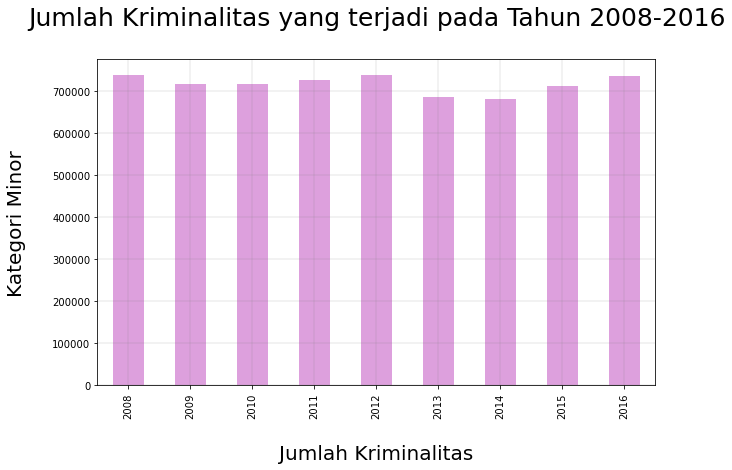

In [25]:
df_total.plot(kind = "bar",
              figsize = (10,6),
              legend = False,
              color = "plum")
plt.title("Jumlah Kriminalitas yang terjadi pada Tahun 2008-2016\n", fontsize = 25)
plt.xlabel("\nJumlah Kriminalitas", fontsize = 20)
plt.ylabel("Kategori Minor\n", fontsize = 20)
plt.grid(color = "grey", linewidth = 0.2)
plt.show()

Berdasarkan visualisasi di atas, diperoleh bahwa tahun 2008, 2009, 2010, 2011, 2012, 2015, dan 2016 memiliki jumlah kriminalitas di atas 700000. Sedangkan, terjadi penurunan pada tahun 2013 dan 2014 dengan jumlah kriminalitas di bawah 700000. 

### Pertanyaan:
    Bandingkan jumlah kriminalitas yang berdasarkan kategori minor terjadi di wilayah London pada tahun 2008-2016!

In [26]:
# menghapus kolom yang tidak diperlukan
df_minor = df.drop(['lsoa_code', 'borough', 'year', 'month'], axis = 1)

# membuat pivot tabel untuk melihat jumlah kriminal tertinggi berdasarkan kategori minor
minor_cat = pd.pivot_table(df_minor, values = 'value', 
                                       aggfunc = np.sum, 
                                       index = ['major_category', 'minor_category'])
minor_cat

value
major_category              minor_category                                
Burglary                    Burglary in Other Buildings             263011
                            Burglary in a Dwelling                  491282
Criminal Damage             Criminal Damage To Dwelling             154116
                            Criminal Damage To Motor Vehicle        265463
                            Criminal Damage To Other Building        66003
                            Other Criminal Damage                   145356
Drugs                       Drug Trafficking                         35819
                            Other Drugs                               2998
                            Possession Of Drugs                     431948
Fraud or Forgery            Counted per Victim                        3840
                            Other Fraud & Forgery                     1485
Other Notifiable Offences   Going Equipped                            5530
                            Other Notifiable                        100819
Robbery                     Business Property                        21295
                            Personal Property                       237578
Sexual Offences             Other Sexual                              1005
                            Rape                                       268
Theft and Handling          Handling Stolen Goods                    16100
                            Motor Vehicle Interference & Tampering   56224
                            Other Theft                             980085
                            Other Theft Person                      308842
                            Theft From Motor Vehicle                569956
                            Theft From Shops                        345142
                            Theft/Taking Of Motor Vehicle           216538
                            Theft/Taking of Pedal Cycle             168974
Violence Against the Person Assault with Injury                     451001
                            Common Assault                          413690
                            Harassment                              458124
                            Murder                                     949
                            Offensive Weapon                         37983
                            Other violence                           70778
                            Wounding/GBH                            125556

dari tabel di atas, terlihat jumlah kasus kriminalitas berdasarkan masing-masing kategori pada tahun 2008-2016. Berikut ini visualisasi beberapa plot untuk minor kategori.

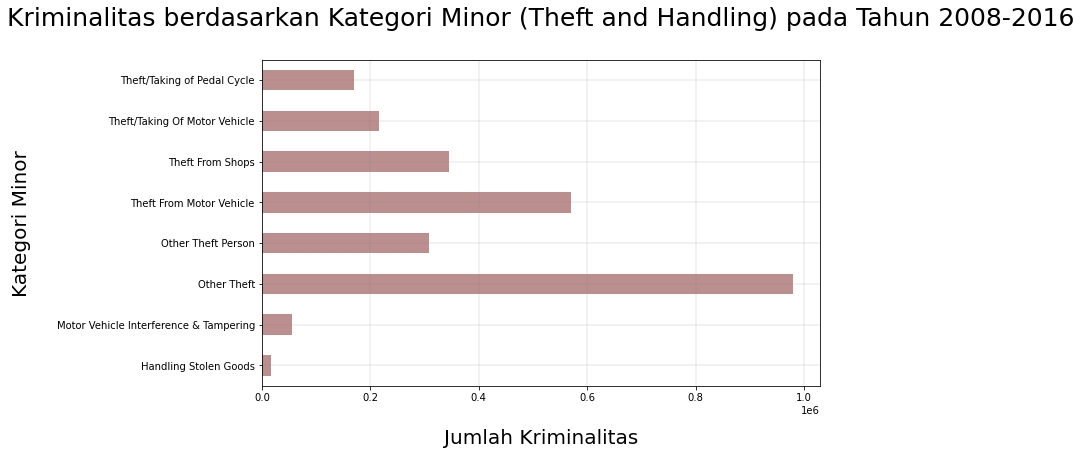

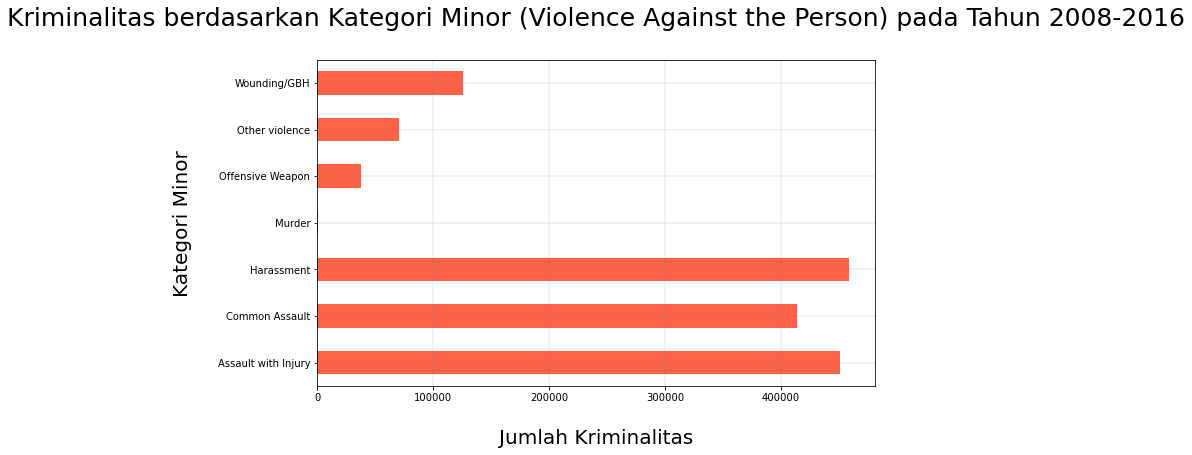

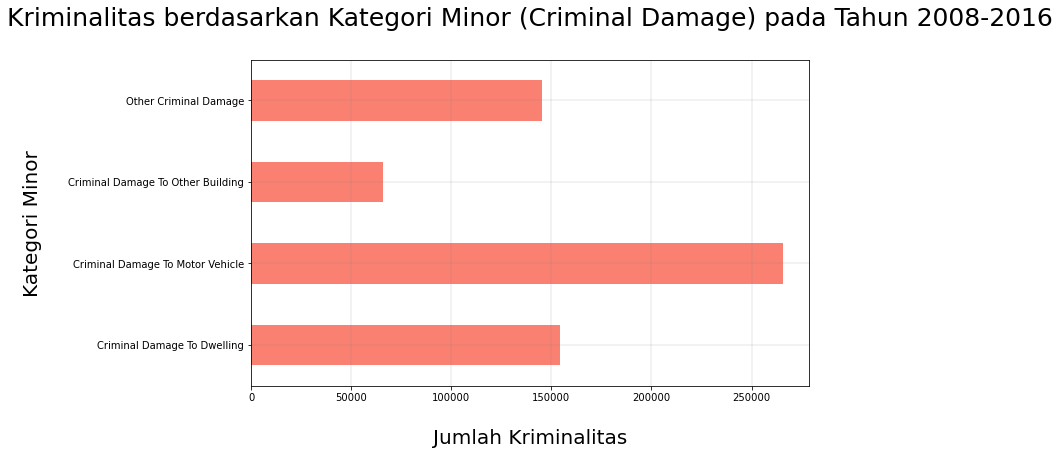

In [27]:
df_theft = minor_cat.loc["Theft and Handling"]
df_theft.plot(kind = "barh",
              figsize = (10,6),
              legend = False,
              color = "rosybrown")
plt.title("Kriminalitas berdasarkan Kategori Minor (Theft and Handling) pada Tahun 2008-2016\n", fontsize = 25)
plt.xlabel("\nJumlah Kriminalitas", fontsize = 20)
plt.ylabel("Kategori Minor\n", fontsize = 20)
plt.grid(color = "grey", linewidth = 0.2)
plt.show()


df_violence = minor_cat.loc["Violence Against the Person"]
df_violence.plot(kind = "barh",
                 figsize = (10,6),
                 legend = False,
                 color = "tomato")
plt.title("Kriminalitas berdasarkan Kategori Minor (Violence Against the Person) pada Tahun 2008-2016\n", fontsize = 25)
plt.xlabel("\nJumlah Kriminalitas", fontsize = 20)
plt.ylabel("Kategori Minor\n", fontsize = 20)
plt.grid(color = "grey", linewidth = 0.2)
plt.show()


df_criminal = minor_cat.loc["Criminal Damage"]
df_criminal.plot(kind = "barh",
              figsize = (10,6),
              legend = False,
              color = "salmon")
plt.title("Kriminalitas berdasarkan Kategori Minor (Criminal Damage) pada Tahun 2008-2016\n", fontsize = 25)
plt.xlabel("\nJumlah Kriminalitas", fontsize = 20)
plt.ylabel("Kategori Minor\n", fontsize = 20)
plt.grid(color = "grey", linewidth = 0.2)
plt.show()

Berdasarkan visualisasi di atas, dapat terlihat tingkat kriminalitas untuk masing-masing kategori minor dengan pengelompokan kategori majornya. Untuk kategori minor pada theft and handling, kriminalitas tertinggi adalah other theft. Untuk kategori minor violence against the person, kriminalitas tertinggi adalah harassment. Sedangkan untuk kategori minor criminal damage, kriminalitas tertinggi adalah criminal damage to motor vehicle.

#### Kesimpulan:
* Dapat terlihat tingkat kriminalitas untuk masing-masing tahun pada periode 2008-2016
* Dapat terlihat tingkat kriminalitas untuk masing-masing kategori minor dengan pengelompokan kategori majornya.

---

## Pie Chart

### Pertanyaan:
    Berapa persentase jumlah kriminalitas di 10 wilayah London tertinggi pada tahun 2008-2016?

In [28]:
# menghapus kolom yang tidak diperlukan
df_borough = df.drop(['lsoa_code', 'major_category', 'minor_category', 'month'], axis = 1)

# mengelompokkan data
df_borough = df_borough.set_index('year').groupby('borough').sum()
top_borough = df_borough.sort_values(by = 'value', ascending = False).head(10)
top_borough

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


dari data di atas, terlihat 10 wilayah di London dengan tingkat kriminalitas tertinggi.

No handles with labels found to put in legend.


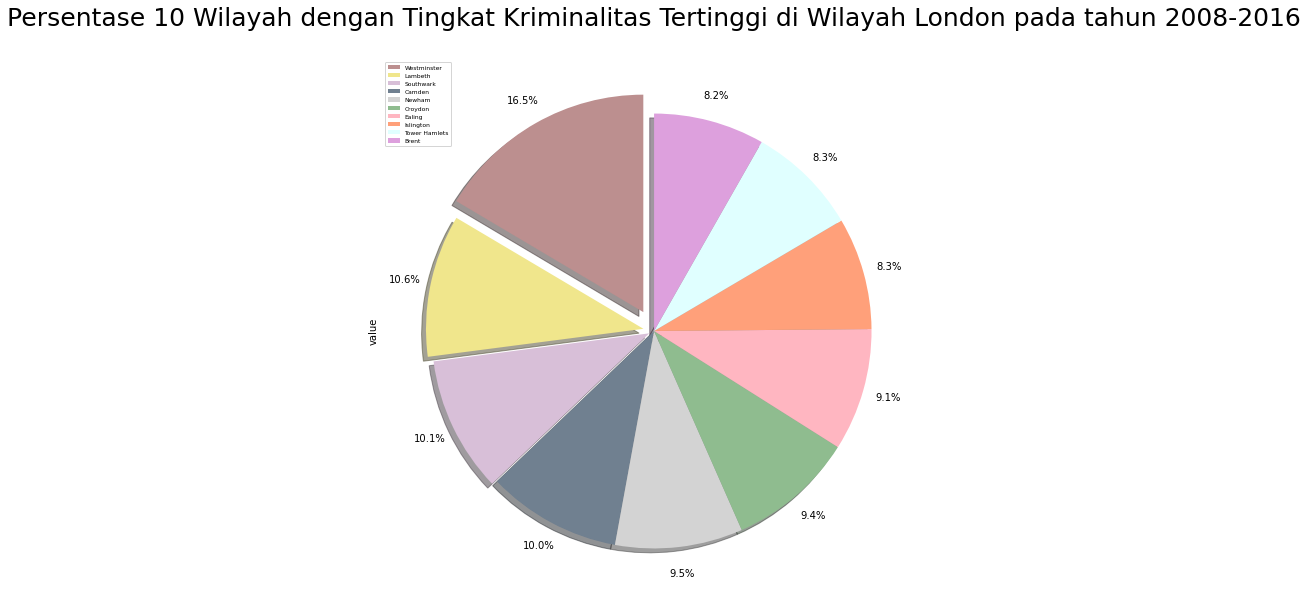

In [29]:
# jarak antar slice pie chart
explode_list = [0.1, 0.05, 0.025, 0, 0, 0, 0, 0, 0, 0]

# list warna yang akan digunakan pada pie chart
colors_list = ['rosybrown', 'khaki', 'thistle', 'slategrey', 'lightgrey', 'darkseagreen', 'lightpink', 'lightsalmon', 'lightcyan', 'plum']

top_borough.plot(kind = 'pie',
                 figsize = (20,10),
                 autopct = '%1.1f%%',
                 startangle = 90,
                 shadow = True,
                 labels = None,
                 subplots = True,
                 pctdistance = 1.12,
                 explode = explode_list,
                 colors = colors_list
                )

plt.title('Persentase 10 Wilayah dengan Tingkat Kriminalitas Tertinggi di Wilayah London pada tahun 2008-2016\n', fontsize = 25)
plt.legend(labels = top_borough.index, loc = 2, prop = {'size': 6})
plt.show()

Berdasarkan visualisasi di atas, dapat terlihat tingkat kriminalitas tertinggi pada 10 wilayah di London pada tahun 2008-2016, diperoleh Westminster dengan presentase tertinggi sebesar 16.5%, Lambeth dengan presentase tertinggi kedua sebesar 10.6%. Sedangkan Brent dengan presentase tertinggi kesepuluh dengan presentase sebesar 8.2%. Terlihat bahwa beda presentase urutan pertama dengan kedua cukup besar sedangkan urutan kedua hingga kesepuluh memiliki perbedaan yang sangat kecil.

### Pertanyaan:
    Berapa persentase jumlah kriminalitas di London berdasarkan kategori major pada tahun 2008-2016?

In [30]:
# menghapus kolom yang tidak diperlukan
df_major = df.drop(['lsoa_code', 'borough', 'minor_category', 'year', 'month'], axis = 1)

# mengelompokkan data
df_major = df_major.groupby('major_category').size()
df_major

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

dari data di atas, diperoleh jumlah kriminalitas berdasarkan kategori major.

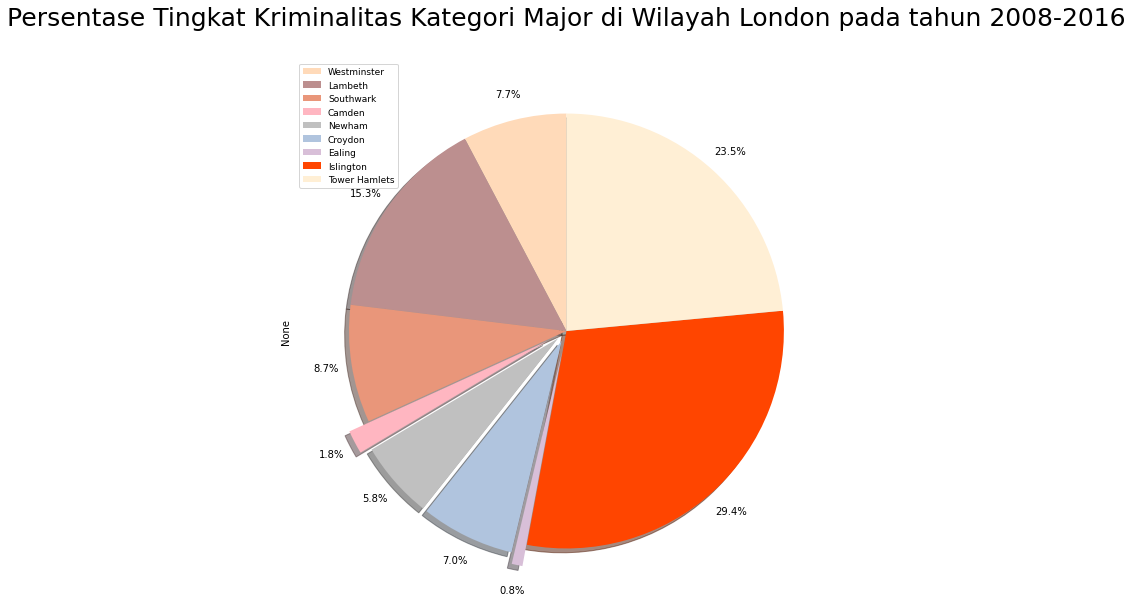

In [31]:
# jarak antar slice pie chart
explode_list = [0, 0, 0, 0.1, 0.05, 0.05, 0.1, 0, 0]

# list warna yang akan digunakan pada pie chart
colors_list = ['peachpuff', 'rosybrown', 'darksalmon', 'lightpink', 'silver', 
               'lightsteelblue', 'thistle', 'orangered', 'papayawhip']

df_major.plot(kind = 'pie',
              figsize = (20,10),
              autopct = '%1.1f%%',
              startangle = 90,
              shadow = True,
              labels = None,
              subplots = True,
              pctdistance = 1.12,
              explode = explode_list,
              colors = colors_list 
             )

plt.title('Persentase Tingkat Kriminalitas Kategori Major di Wilayah London pada tahun 2008-2016\n', fontsize = 25)
plt.legend(labels = top_borough.index, loc = 2, prop={'size': 9})
plt.show()

Berdasarkan visualisasi di atas, dapat terlihat tingkat kriminalitas berdasarkan kategori major di wilayah London pada tahun 2008-2016, diperoleh kategori sexual offences memiliki presentase terkecil yaitu sebesar 0.8%, kategori fraud and forgery memiliki presentase terkecil kedua yaitu sebesar 1.8%. Sedangkan theft and handling memiliki presentase kejadian terbesar sebanyak 29,4%.

#### Kesimpulan:
* Westminster merupakan wilayah di London dengan presentase terjadinya krimialitas tertinggi yaitu sebesar 16.5%
* Sexual Offences memiliki presentase kejadian paling rendah di wilayah London pada tahun 2008-2016 yaitu sebanyak 0.8%

---

## Box Plot

### Pertanyaan:
    Bagaimana distribusi statistik dari data jumlah kasus kriminalitas di wilayah City of London pertahun pada periode 2008-2016?

In [32]:
# memilih kolom yang diinginkan dan menghapus kolom yang tidak diperlukan 
df_city = df[df['borough'] == 'City of London']
df_city = df_city.drop(['lsoa_code', 'major_category', 'minor_category', 'month'], axis = 1)

# mengelompokkan data
df_city = df_city[['year', 'value']].groupby(['year']).agg({'value': 'sum'})
df_city

,value
year,
2008,0
2009,0
2010,0
2011,69
2012,157
2013,110
2014,115
2015,151
2016,178


dari data di atas, diperoleh jumlah kriminalitas yang terjadi setiap tahun khusus wilayah City of Landon pada periode 2008-2016. Berikut ini statistik deskriptif dari data di atas:

In [33]:
# statistik deskriptif
df_city.describe()

,value
count,9.000000
mean,86.666667
std,72.128358
min,0.000000
25%,0.000000
50%,110.000000
75%,151.000000
max,178.000000


dari data di atas, terlihat jumlah maksimum terjadinya kriminal di City of Landon adalah sebanyak 178 dan jumlah minimumnya adalah 0, dengan rata-rata kejadian selama 9 tahun adalah sebanyak 86.67

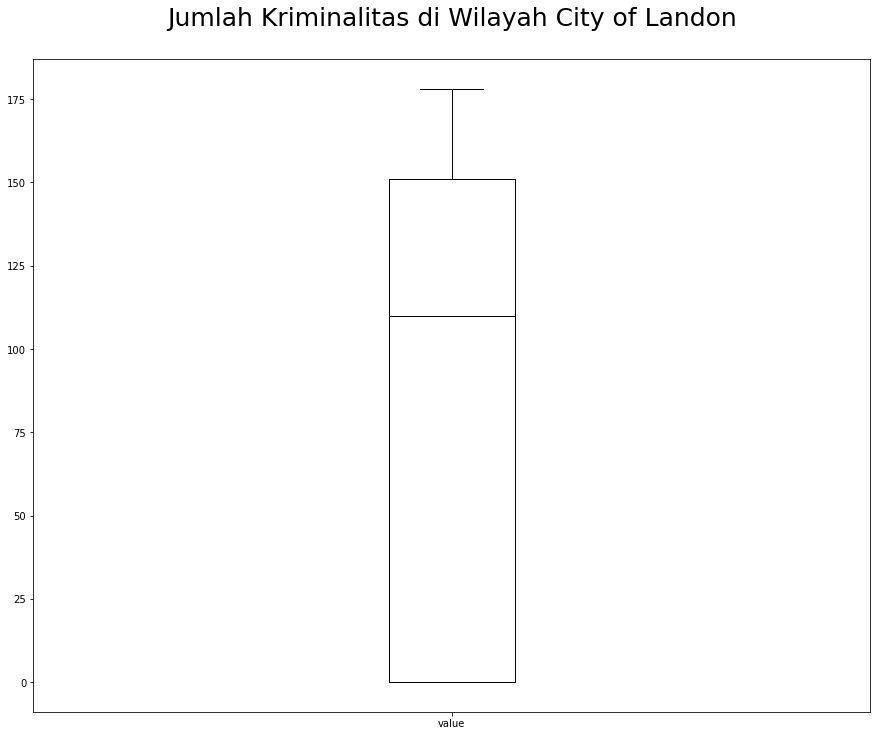

In [34]:
df_city.plot(kind = 'box',
             figsize=(15,12),
             color = 'black'
            )

plt.title("Jumlah Kriminalitas di Wilayah City of Landon\n", fontsize = 25)
plt.show()

Berdasarkan visualisasi di atas, terlihat nilai minimum dari data sebesar 0 dan nilai maksimum lebih besar dari 175. Dari data tersebut tidak terdapat outlier/data yang signifikan berbeda dari data lainnya. Nilai median dari data tersebut berada pada kisaran 110.

### Pertanyaan:
    Bagaimana distribusi statistik dari data jumlah kasus kriminalitas di masing-masing wilayah London pada periode 2008-2016?

In [35]:
# menghapus kolom yang tidak diperlukan
borough_cr = df.drop(['lsoa_code', 'major_category', 'minor_category','year', 'month'], axis = 1)

# mengelompokkan data
borough_cr = borough_cr.groupby('borough').sum()
borough_cr

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


dari data di atas, terlihat jumlah kriminalitas di masing-masing wilayah di London pada tahun 2008-2016. Berikut ini statistik deskriptif dari data di atas:

In [36]:
# statistik deskriptif
borough_cr.describe()

,value
count,33.000000
mean,195386.606061
std,79148.057551
min,780.000000
25%,149447.000000
50%,203879.000000
75%,228613.000000
max,455028.000000


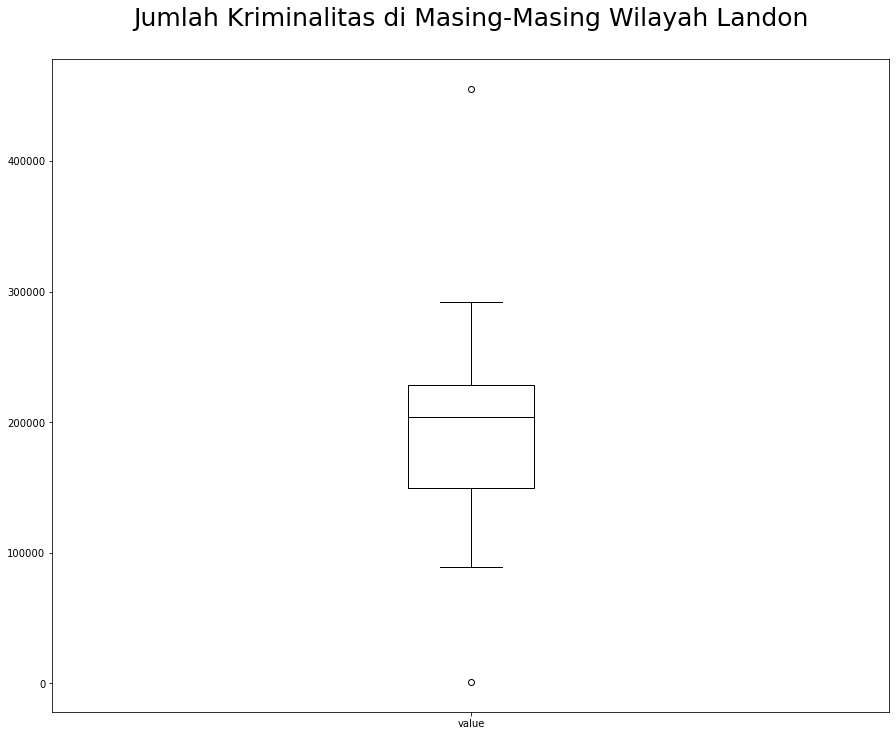

In [37]:
borough_cr.plot(kind = 'box',
                figsize=(15,12),
                color = 'black'
               )

plt.title("Jumlah Kriminalitas di Masing-Masing Wilayah Landon\n", fontsize = 25)
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa data tersebut memiliki dua outlier yang dapat diartikan bahwa terdapat wilayah yang mengalami perbedaan jumlah kriminalitas yang sangat signifikan terhadap wilayah lainnya. Jika ditinjau lebih lanjut, wilayah tersebut adalah Westminster memiliki jumlah kriminalitas yang sangat tinggi dan perbedaan yang sangat jauh dari data lainnya, begitupun City of London memiliki jumlah kriminalitas yang sangat rendah dan perbedaan yang sangat jauh dari data lainnya. Terlihat pula sebaran data apabila tidak memedulikan outlier berada pada kisaran 100000 hingga 300000 dengan nilai median lebih dari 20000.

#### Kesimpulan:
* Sebaran data jumlah kriminalitas khusus City of London memiliki sebaran data maksimum 178 dan minimum 0 tanpa ada data outlier.
* Pada sebaran data jumlah kriminalitas di masing-masing wilayah terdapat perbedaan yang sangat signifikan berbeda yaitu Westminster dan City of Landon.

---

## Scatter Plot

### Pertanyaan:
    Bagaimana sebaran data bulanan dari jumlah kasus kriminalitas di wilayah City of London pada tahun 2016?

In [38]:
# menghapus kolom yang tidak diperlukan dan memilih kolom yang diinginkan
df_month = df.drop(['lsoa_code', 'borough', 'major_category', 'minor_category'], axis = 1)
monthly2016 = df_month[df_month['year'] == 2016]

# mengelompokkan data
monthly2016 = monthly2016.set_index('year').groupby('month').sum()
monthly2016 = monthly2016.reset_index()
monthly2016

,month,value
0,1,58847
1,2,56697
2,3,59167
3,4,58637
4,5,63990
5,6,62262
6,7,65519
7,8,62666
8,9,61412
9,10,63405


dari tabel di atas, terlihat jumlah kriminalitas dengan sebaran data bulanan khusus tahun 2016.

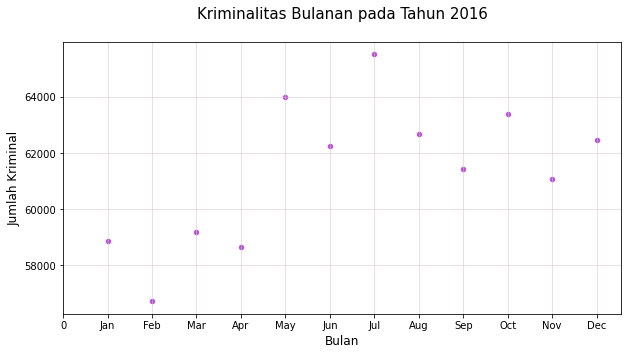

In [39]:
monthly2016.plot(kind = 'scatter', 
                 x = 'month',
                 y = 'value',
                 figsize = (10,5), 
                 color = 'mediumorchid'
                )
plt.title('Kriminalitas Bulanan pada Tahun 2016\n', fontsize = 15)
plt.xlabel('Bulan', fontsize = 12)
plt.ylabel('Jumlah Kriminal', fontsize = 12)
plt.xticks(np.arange(len(monthly2016['month'])+1), ['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(color = 'thistle', linewidth = 0.5)
plt.show()

Dari visualisasi di atas, sebaran data bulanan tahun 2016 berada di sekitar 55000 hingga 65000. Terlihat sebaran data bulanan jumlah kriminalitas terendah di bulan Februari 2016 dan jumlah kriminal tertinggi di bulan Juli 2016. 

### Pertanyaan:
    Bagaimana sebaran data bulanan dari jumlah kasus kriminalitas di wilayah City of London pada periode 2008-2016?

In [40]:
# menghapus kolom yang tidak diperlukan dan memilih kolom yang diinginkan
df_month = df.drop(['lsoa_code', 'borough', 'major_category', 'minor_category'], axis = 1)

# mengelompokkan data
monthly = df_month.set_index('year').groupby('month').sum()
monthly = monthly.reset_index()
monthly

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


dari tabel di atas, terlihat sebaran data bulanan untuk setiap tahun pada periode 2008-2016.

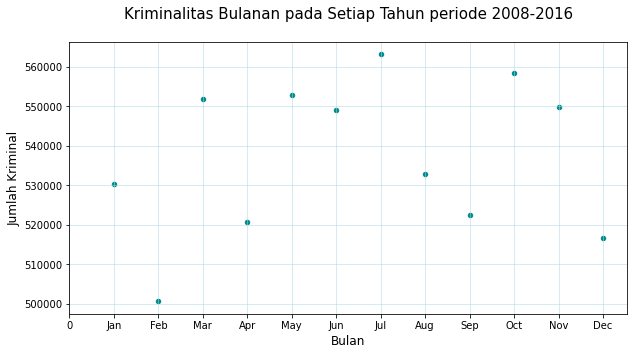

In [41]:
monthly.plot(kind = 'scatter', 
             x = 'month',
             y = 'value',
             figsize = (10,5),
             color = 'darkcyan'
            )
plt.title('Kriminalitas Bulanan pada Setiap Tahun periode 2008-2016\n', fontsize = 15)
plt.xlabel('Bulan', fontsize = 12)
plt.ylabel('Jumlah Kriminal', fontsize = 12)
plt.xticks(np.arange(len(monthly2016['month'])+1), ['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(color = 'lightblue', linewidth = 0.5)
plt.show()

Dari visualisasi di atas, terlihat sebaran data bulananuntuk setiap tahun pada periode 2008-2016. Diperoleh penjumlahan kriminalitas bulanan untuk setiap tahunnya dengan Februari sebagai bulan dengan jumlah kriminalitas terendah dan Juli sebagai bulan dengan kriminalitas tertinggi.

#### Kesimpulan:
* Sebaran data bulanan jumlah kriminalitas khusus tahun 2016, jumlah terendah di bulan Februari dan tertinggi di bulan Juli.
* Sama seperti analisis sebelumnya, jumlah kriminalitas terendah di bulan Februari dan tertinggi di bulan Juli untuk setiap bulannya pada periode 2008-2016.

---

## Word Clouds

### Pertanyaan:
    Wilayah apa yang memiliki tindak kriminal kategori major paling sering terjadi?

In [42]:
# menghapus kolom yang tidak diperlukan 
df_major = df.drop(['lsoa_code', 'minor_category', 'year', 'month'], axis = 1)

# mengelompokkan data
major_cat = df_major.groupby('borough').sum()
major_cat

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


dari data di atas, terlihat jumlah kriminalitas kategori major untuk setiap wilayah pada tahun 2008-2016.

In [43]:
# melihat jumlah value
total = major_cat['value'].sum()
total

6447758

In [44]:
# inisiasi objek wordcloud
max_words = 2000
word_string = ''
for borough in major_cat.index.values:
    # memeriksa apakah nama negara adalah nama satu kata
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(major_cat.loc[borough,
                                             'value'] / float(total) * max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)
        
word_string

'Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Barnet Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Bexley Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent Brent

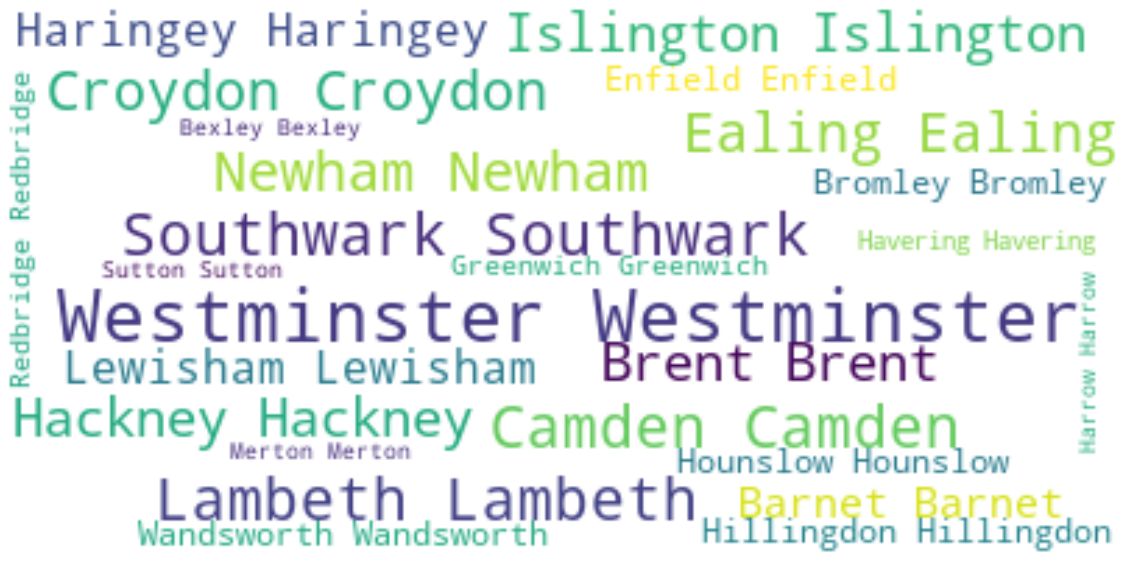

In [45]:
# menggunakan set untuk menghapus stopword yang berlebihan
stopwords = set(STOPWORDS)

# generate wordcloud
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords).generate(word_string)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Dari visualisasi di atas, diperoleh Westminster menjadi wilayah dengan tindak kriminal terbanyak, kemudian diikuti oleh Lambeth dengan wilayah dengan tindak kriminal terbanyak kedua, dan Southwark dengan wilayah terbanyak ketiga.

---

## Folium Maps

### Pertanyaan:
    Bagaimana implementasi peta London menggunakan Folium?

In [46]:
# set latitude dan longitude london
latitude = 51.509865
longitude = -0.118092

london_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
london_map

Dari visualisasi di atas, ditunjukkan peta London menggunakan folium map